# Trabajo Práctico 2
# Metodologías avanzadas de aprendizaje automático para la gestión en organizaciones 

El conjunto de datos consiste en 3 tipos de imágenes



1.   Incidencias urbanas, como árboles caidos, aceras rotas o huecos en las vías
2.   Contenido explícito, en este caso utilizamos imagenes de Personas en traje de baño
3.   Imágenes de Armas

La idea es entrenar un modelo supervisado utilizando Redes Neuronales Convolucionales para filtrar las imagenes lícitas de incidencias urbanas, de imágenes inapropiadas (contenido sexual y violento).

Este modelo es un ejemplo de moderación de contenido que se puede aplicar en múltiples ámbitos, en este caso una app de reporte de incidencias urbanas.

# Lectura de datos

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#autenticación de credenciales google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#mi archivo en drive
fileDownloaded = drive.CreateFile({'id':'1v6mUf0H2nk48Gbt75ZWPFqJcQz99hopJ'})
fileDownloaded_test = drive.CreateFile({'id':'1DL2frz2hXtO0VN8ye1fCAHcUIz-2uKyv'})

#bajar contenido a colab
fileDownloaded.GetContentFile('images.zip')
fileDownloaded_test.GetContentFile('images_test.zip')
# !unrar x /content/sabrina.rar

In [ ]:
! unzip /content/images.zip
! unzip /content/images_test.zip

## Clasificación de imágenes

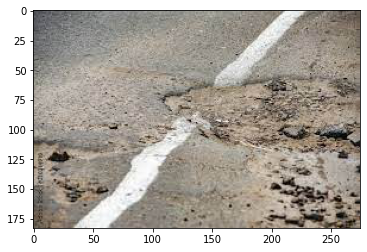

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread('/content/images/incidence/download (11).jpeg'))
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

## Lectura y tratamiento de imagenes

In [ ]:
batch_size = 128

# https://keras.io/api/preprocessing/image/#imagedatagenerator-class

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    zoom_range = [0.6, 1],
    rotation_range=20
)

# https://keras.io/api/preprocessing/image/#flowfromdirectory-method

train_generator = train_datagen.flow_from_directory(                
        '/content/images',  # Directorio donde están las imágenes
        target_size=(100, 100), # Recorta a 100 x 100
        color_mode = 'grayscale',
        batch_size=batch_size,       
        classes = ['bikini','incidence','weapon'], # Clases
        )

Found 1511 images belonging to 3 classes.


In [ ]:
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

val_generator = validation_datagen.flow_from_directory(                
        '/content/images_test',  # Directorio donde están las imágenes
        target_size=(100, 100), # Recorta a 100 x 100
        color_mode = 'grayscale',
        batch_size=batch_size,   
        classes = ['bikini','incidence','weapon'], # Clases
        )

Found 285 images belonging to 3 classes.


# Modelos


## Modelo 1

In [ ]:
model1 = tf.keras.models.Sequential([
                                    
    # Entrada
    tf.keras.layers.Input(shape=(100, 100, 1)), # 3 en color, 1 es grayscale

    # Convolución 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'), # , input_shape=(100, 100, 3)
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolución 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    # Convolución 5
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Achatamiento
    tf.keras.layers.Flatten(),
        
    # Capa densa
    tf.keras.layers.Dense(100, activation='relu'),

    # cantidad de neuronas de salida, una por clase
    tf.keras.layers.Dense(3, activation='softmax') 

])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

n_epochs = 10
history = model1.fit(train_generator, epochs=n_epochs, verbose=True)

Epoch 1/10
12/12 [==============================] - 14s 220ms/step - loss: 1.0840 - accuracy: 0.4103
Epoch 2/10
12/12 [==============================] - 3s 234ms/step - loss: 1.0504 - accuracy: 0.4308
Epoch 3/10
12/12 [==============================] - 3s 233ms/step - loss: 1.0031 - accuracy: 0.4699
Epoch 4/10
12/12 [==============================] - 3s 231ms/step - loss: 0.9431 - accuracy: 0.5559
Epoch 5/10
12/12 [==============================] - 3s 235ms/step - loss: 0.8830 - accuracy: 0.5850
Epoch 6/10
12/12 [==============================] - 3s 237ms/step - loss: 0.8277 - accuracy: 0.6142
Epoch 7/10
12/12 [==============================] - 3s 227ms/step - loss: 0.8025 - accuracy: 0.6294
Epoch 8/10
12/12 [==============================] - 3s 228ms/step - loss: 0.7948 - accuracy: 0.6559
Epoch 9/10
12/12 [==============================] - 3s 227ms/step - loss: 0.8197 - accuracy: 0.6300
Epoch 10/10
12/12 [==============================] - 3s 230ms/step - loss: 0.7427 - accuracy: 0.676

## Model 2

Cambiamos el filtro de la última capa Convolucional de 64 a 128
Aumentamos el Nº de epochs a 15

In [ ]:
model2 = tf.keras.models.Sequential([
                                    
    # Entrada
    tf.keras.layers.Input(shape=(100, 100, 1)), # 3 en color, 1 es grayscale

    # Convolución 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'), # , input_shape=(100, 100, 3)
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolución 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    # Convolución 5
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Achatamiento
    tf.keras.layers.Flatten(),
        
    # Capa densa
    tf.keras.layers.Dense(100, activation='relu'),

    # cantidad de neuronas de salida, una por clase
    tf.keras.layers.Dense(3, activation='softmax') 

])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

n_epochs = 15
history2 = model2.fit(train_generator, epochs=n_epochs, verbose=True)

Epoch 1/15
12/12 [==============================] - 3s 234ms/step - loss: 1.0895 - accuracy: 0.4143
Epoch 2/15
12/12 [==============================] - 3s 233ms/step - loss: 1.0550 - accuracy: 0.4222
Epoch 3/15
12/12 [==============================] - 3s 233ms/step - loss: 1.0094 - accuracy: 0.4593
Epoch 4/15
12/12 [==============================] - 3s 235ms/step - loss: 0.9766 - accuracy: 0.5036
Epoch 5/15
12/12 [==============================] - 3s 232ms/step - loss: 0.9336 - accuracy: 0.5433
Epoch 6/15
12/12 [==============================] - 3s 232ms/step - loss: 0.8633 - accuracy: 0.5976
Epoch 7/15
12/12 [==============================] - 3s 228ms/step - loss: 0.8638 - accuracy: 0.5910
Epoch 8/15
12/12 [==============================] - 3s 229ms/step - loss: 0.8086 - accuracy: 0.6386
Epoch 9/15
12/12 [==============================] - 3s 237ms/step - loss: 0.8145 - accuracy: 0.6433
Epoch 10/15
12/12 [==============================] - 3s 235ms/step - loss: 0.7936 - accuracy: 0.6334

## Model 3

Aumentamos cantidad de neuronas en capa densa 

In [ ]:
model3 = tf.keras.models.Sequential([
                                    
    # Entrada
    tf.keras.layers.Input(shape=(100, 100, 1)), # 3 en color, 1 es grayscale

    # Convolución 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'), # , input_shape=(100, 100, 3)
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolución 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    # Convolución 5
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Achatamiento
    tf.keras.layers.Flatten(),
        
    # Capa densa
    tf.keras.layers.Dense(200, activation='relu'),

    # cantidad de neuronas de salida, una por clase
    tf.keras.layers.Dense(3, activation='softmax') 

])

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

n_epochs = 15
history3 = model3.fit(train_generator, epochs=n_epochs, verbose=True)

Epoch 1/15
12/12 [==============================] - 3s 230ms/step - loss: 1.0835 - accuracy: 0.3958
Epoch 2/15
12/12 [==============================] - 3s 281ms/step - loss: 1.0500 - accuracy: 0.4633
Epoch 3/15
12/12 [==============================] - 3s 229ms/step - loss: 1.0269 - accuracy: 0.4474
Epoch 4/15
12/12 [==============================] - 3s 233ms/step - loss: 0.9560 - accuracy: 0.5486
Epoch 5/15
12/12 [==============================] - 3s 231ms/step - loss: 0.8914 - accuracy: 0.5811
Epoch 6/15
12/12 [==============================] - 3s 235ms/step - loss: 0.8391 - accuracy: 0.6109
Epoch 7/15
12/12 [==============================] - 3s 235ms/step - loss: 0.7980 - accuracy: 0.6446
Epoch 8/15
12/12 [==============================] - 3s 228ms/step - loss: 0.7572 - accuracy: 0.6698
Epoch 9/15
12/12 [==============================] - 3s 229ms/step - loss: 0.9255 - accuracy: 0.5797
Epoch 10/15
12/12 [==============================] - 3s 242ms/step - loss: 0.8233 - accuracy: 0.6234

## Model 4
Incluimos otra capa densa de 20 neuronas

In [ ]:
model4 = tf.keras.models.Sequential([
                                    
    # Entrada
    tf.keras.layers.Input(shape=(100, 100, 1)), # 3 en color, 1 es grayscale

    # Convolución 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'), # , input_shape=(100, 100, 3)
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolución 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    # Convolución 5
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Achatamiento
    tf.keras.layers.Flatten(),
        
    # Capa densa
    tf.keras.layers.Dense(100, activation='relu'),

    # Capa densa
    tf.keras.layers.Dense(20, activation='relu'),

    # cantidad de neuronas de salida, una por clase
    tf.keras.layers.Dense(3, activation='softmax') 

])

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

n_epochs = 15
history4 = model4.fit(train_generator, epochs=n_epochs, verbose=True)

Epoch 1/15
12/12 [==============================] - 3s 235ms/step - loss: 1.0911 - accuracy: 0.3468
Epoch 2/15
12/12 [==============================] - 3s 233ms/step - loss: 1.0737 - accuracy: 0.4143
Epoch 3/15
12/12 [==============================] - 3s 234ms/step - loss: 1.0258 - accuracy: 0.4322
Epoch 4/15
12/12 [==============================] - 3s 231ms/step - loss: 1.0203 - accuracy: 0.4315
Epoch 5/15
12/12 [==============================] - 3s 234ms/step - loss: 1.0063 - accuracy: 0.4844
Epoch 6/15
12/12 [==============================] - 3s 229ms/step - loss: 0.9641 - accuracy: 0.5189
Epoch 7/15
12/12 [==============================] - 3s 233ms/step - loss: 0.8997 - accuracy: 0.5745
Epoch 8/15
12/12 [==============================] - 3s 233ms/step - loss: 0.8765 - accuracy: 0.5897
Epoch 9/15
12/12 [==============================] - 3s 230ms/step - loss: 0.8637 - accuracy: 0.5923
Epoch 10/15
12/12 [==============================] - 3s 256ms/step - loss: 0.8410 - accuracy: 0.6115

## Model 5 

Agregar capas de Convolucion en la 2da etapa

In [ ]:
model5 = tf.keras.models.Sequential([
                                    
    # Entrada
    tf.keras.layers.Input(shape=(100, 100, 1)), # 3 en color, 1 es grayscale

    # Convolución 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'), # , input_shape=(100, 100, 3)
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolución 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    # Convolución 5
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Achatamiento
    tf.keras.layers.Flatten(),
        
    # Capa densa
    tf.keras.layers.Dense(100, activation='relu'),

    # cantidad de neuronas de salida, una por clase
    tf.keras.layers.Dense(3, activation='softmax') 

])

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

n_epochs = 15
history5 = model5.fit(train_generator, epochs=n_epochs, verbose=True)

Epoch 1/15
12/12 [==============================] - 14s 262ms/step - loss: 1.0865 - accuracy: 0.3938
Epoch 2/15
12/12 [==============================] - 3s 256ms/step - loss: 1.0672 - accuracy: 0.4302
Epoch 3/15
12/12 [==============================] - 3s 260ms/step - loss: 1.0167 - accuracy: 0.4540
Epoch 4/15
12/12 [==============================] - 3s 263ms/step - loss: 0.9552 - accuracy: 0.5513
Epoch 5/15
12/12 [==============================] - 3s 264ms/step - loss: 0.9186 - accuracy: 0.5731
Epoch 6/15
12/12 [==============================] - 3s 257ms/step - loss: 0.8474 - accuracy: 0.6314
Epoch 7/15
12/12 [==============================] - 3s 263ms/step - loss: 0.8532 - accuracy: 0.5970
Epoch 8/15
12/12 [==============================] - 3s 258ms/step - loss: 0.8149 - accuracy: 0.6519
Epoch 9/15
12/12 [==============================] - 3s 255ms/step - loss: 0.7594 - accuracy: 0.6605
Epoch 10/15
12/12 [==============================] - 3s 261ms/step - loss: 0.7093 - accuracy: 0.675

## Model 6
Agregar capas de Convolucion en cada ronda, antes del MaxPooling y agregamos una capa de Normalización

In [ ]:
model6 = tf.keras.models.Sequential([
                                    
    # Entrada
    tf.keras.layers.Input(shape=(100, 100, 1)), # 3 en color, 1 es grayscale

    # Convolución 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Convolución 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.BatchNormalization(),
    # Convolución 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 4
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
        
    # Convolución 5
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Convolución 5
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Achatamiento
    tf.keras.layers.Flatten(),
        
    # Capa densa
    tf.keras.layers.Dense(100, activation='relu'),

    # cantidad de neuronas de salida, una por clase
    tf.keras.layers.Dense(3, activation='softmax') 

])

model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

n_epochs = 15
history6 = model6.fit(train_generator, epochs=n_epochs, verbose=True)

Epoch 1/15
12/12 [==============================] - 4s 267ms/step - loss: 1.0345 - accuracy: 0.4692
Epoch 2/15
12/12 [==============================] - 3s 265ms/step - loss: 0.9217 - accuracy: 0.5857
Epoch 3/15
12/12 [==============================] - 3s 266ms/step - loss: 0.8316 - accuracy: 0.6307
Epoch 4/15
12/12 [==============================] - 3s 268ms/step - loss: 0.7463 - accuracy: 0.6664
Epoch 5/15
12/12 [==============================] - 3s 266ms/step - loss: 0.7050 - accuracy: 0.7095
Epoch 6/15
12/12 [==============================] - 4s 285ms/step - loss: 0.6689 - accuracy: 0.7161
Epoch 7/15
12/12 [==============================] - 3s 263ms/step - loss: 0.6385 - accuracy: 0.7273
Epoch 8/15
12/12 [==============================] - 3s 265ms/step - loss: 0.6149 - accuracy: 0.7379
Epoch 9/15
12/12 [==============================] - 3s 267ms/step - loss: 0.6032 - accuracy: 0.7525
Epoch 10/15
12/12 [==============================] - 3s 263ms/step - loss: 0.5850 - accuracy: 0.7525

## Model 7
Agregar capas de Normalización luego de cada capa de MaxPooling, aumentamos el Nº de epochs a 20

In [ ]:
model7 = tf.keras.models.Sequential([
                                    
    # Entrada
    tf.keras.layers.Input(shape=(100, 100, 1)), # 3 en color, 1 es grayscale

    # Convolución 1
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.BatchNormalization(),
    
    # Convolución 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.BatchNormalization(),
    # Convolución 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.BatchNormalization(),

    # Convolución 4
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.BatchNormalization(),
    # Convolución 5
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.BatchNormalization(),

    # Achatamiento
    tf.keras.layers.Flatten(),
        
    # Capa densa
    tf.keras.layers.Dense(100, activation='relu'),

    tf.keras.layers.BatchNormalization(),

    # cantidad de neuronas de salida, una por clase
    tf.keras.layers.Dense(3, activation='softmax') 

])

model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

n_epochs = 20
history7 = model7.fit(train_generator, epochs=n_epochs, verbose=True, validation_data=val_generator)

Epoch 1/20
12/12 [==============================] - 5s 361ms/step - loss: 0.9508 - accuracy: 0.6228 - val_loss: 1.1088 - val_accuracy: 0.3439
Epoch 2/20
12/12 [==============================] - 4s 327ms/step - loss: 0.6808 - accuracy: 0.7240 - val_loss: 1.2009 - val_accuracy: 0.3439
Epoch 3/20
12/12 [==============================] - 4s 324ms/step - loss: 0.6224 - accuracy: 0.7419 - val_loss: 1.3524 - val_accuracy: 0.3439
Epoch 4/20
12/12 [==============================] - 4s 319ms/step - loss: 0.5260 - accuracy: 0.7935 - val_loss: 1.7559 - val_accuracy: 0.3439
Epoch 5/20
12/12 [==============================] - 4s 320ms/step - loss: 0.5271 - accuracy: 0.7849 - val_loss: 1.9129 - val_accuracy: 0.3439
Epoch 6/20
12/12 [==============================] - 4s 324ms/step - loss: 0.5011 - accuracy: 0.7869 - val_loss: 2.3374 - val_accuracy: 0.3439
Epoch 7/20
12/12 [==============================] - 4s 321ms/step - loss: 0.4752 - accuracy: 0.7922 - val_loss: 2.5396 - val_accuracy: 0.3439
Epoch 

# Conclusión

El modelo fue mejorando a medida que aumentamos las capas de convolución, sin embargo lo que mejoró el accuracy drasticamente fueron las capas de Normalización que se añadieron luego de cada capa de MaxPooling y entre las capas densas.

Añadir mas capas densas no significo una mejora, ni aumentar el número de neuronas. Tampoco mejoró el hecho de incrementar el número de filtros en las capas convolucionales.

El accuracy final en entrenamiento fue de 0.90

El modelo no se pudo probar con datos de validación, se asume que existe un posible error en la arquitectura o en el ingreso de los datos de validación, ya que el accuracy arroja siempre el mismo resultado 

